# IBM Data Science Coursera Capstone Project
# Using Machine Learning to find the best housing option in Toronto

## Objective: Identify the neighborhood in Toronto, ON, Canada that fits best to a user's preferences 

# Section II: Grouping Neighborhoods

Goal:
1. Obtain clusters of neighborhoods grouped by their similarity in venues and commodities offered
1. Use the clusters to predict the neighborhood with most similarity to a defined preference


### 1. Packages required

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

%matplotlib inline 

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42 #Required to export text in figures as editable text!!
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from collections import Counter

import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

### 2. Parameters

In [2]:
radius=1200 #maximum distance (in meters) to be considered within the neighborhood

### 3. Dataset directories

In [3]:
distances_dir="Datasets/out/clean_all_venues.csv" #Distance matrix obtained in section 1 
neighborhoods_dir="Datasets/Neighbourhoods.csv"
income_dir= "Datasets/out/social_metrics.csv"
crime_dir = "Datasets/out/crime_rate.csv"

### 4. Identify venues within the radius of the neighborhood

#### 4.1 Import distance matrix obtained in Section I

In [4]:
distances_df=pd.read_csv(distances_dir)
print("There are {} rows and {} columns in the dataset".format(distances_df.shape[0],distances_df.shape[1]))
distances_df.head()

There are 15180 rows and 144 columns in the dataset


,Venue,Latitude,Longitude,Group,Wychwood (94),Yonge-Eglinton (100),Yonge-St.Clair (97),York University Heights (27),Yorkdale-Glen Park (31),Lambton Baby Point (114),Lansing-Westgate (38),Lawrence Park North (105),Lawrence Park South (103),Leaside-Bennington (56),Little Portugal (84),Long Branch (19),Malvern (132),Maple Leaf (29),Markland Wood (12),Milliken (130),Mimico (includes Humber Bay Shores) (17),Morningside (135),Moss Park (73),Mount Dennis (115),Mount Olive-Silverstone-Jamestown (2),Mount Pleasant East (99),Mount Pleasant West (104),New Toronto (18),Newtonbrook East (50),Newtonbrook West (36),Niagara (82),North Riverdale (68),North St.James Town (74),O'Connor-Parkview (54),Oakridge (121),Oakwood Village (107),Old East York (58),Palmerston-Little Italy (80),Parkwoods-Donalda (45),Pelmo Park-Humberlea (23),Playter Estates-Danforth (67),Pleasant View (46),Princess-Rosethorn (10),Regent Park (72),Rexdale-Kipling (4),Rockcliffe-Smythe (111),Roncesvalles (86),Rosedale-Moore Park (98),Rouge (131),Runnymede-Bloor West Village (89),Rustic (28),Scarborough Village (139),South Parkdale (85),South Riverdale (70),St.Andrew-Windfields (40),Steeles (116),Stonegate-Queensway (16),Tam O'Shanter-Sullivan (118),Taylor-Massey (61),The Beaches (63),Thistletown-Beaumond Heights (3),Thorncliffe Park (55),Trinity-Bellwoods (81),University (79),Victoria Village (43),Waterfront Communities-The Island (77),West Hill (136),West Humber-Clairville (1),Westminster-Branson (35),Weston (113),Weston-Pellam Park (91),Wexford/Maryvale (119),Willowdale East (51),Willowdale West (37),Willowridge-Martingrove-Richview (7),Woburn (137),Woodbine Corridor (64),Woodbine-Lumsden (60),Agincourt North (129),Agincourt South-Malvern West (128),Alderwood (20),Annex (95),Banbury-Don Mills (42),Bathurst Manor (34),Bay Street Corridor (76),Bayview Village (52),Bayview Woods-Steeles (49),Bedford Park-Nortown (39),Beechborough-Greenbrook (112),Bendale (127),Birchcliffe-Cliffside (122),Black Creek (24),Blake-Jones (69),Briar Hill-Belgravia (108),Bridle Path-Sunnybrook-York Mills (41),Broadview North (57),Brookhaven-Amesbury (30),Cabbagetown-South St.James Town (71),Caledonia-Fairbank (109),Casa Loma (96),Centennial Scarborough (133),Church-Yonge Corridor (75),Clairlea-Birchmount (120),Clanton Park (33),Cliffcrest (123),Corso Italia-Davenport (92),Danforth (66),Danforth East York (59),Don Valley Village (47),Dorset Park (126),Dovercourt-Wallace Emerson-Junction (93),Downsview-Roding-CFB (26),Dufferin Grove (83),East End-Danforth (62),Edenbridge-Humber Valley (9),Eglinton East (138),Elms-Old Rexdale (5),Englemount-Lawrence (32),Eringate-Centennial-West Deane (11),Etobicoke West Mall (13),Flemingdon Park (44),Forest Hill North (102),Forest Hill South (101),Glenfield-Jane Heights (25),Greenwood-Coxwell (65),Guildwood (140),Henry Farm (53),High Park North (88),High Park-Swansea (87),Highland Creek (134),Hillcrest Village (48),Humber Heights-Westmount (8),Humber Summit (21),Humbermede (22),Humewood-Cedarvale (106),Ionview (125),Islington-City Centre West (14),Junction Area (90),Keelesdale-Eglinton West (110),Kennedy Park (124),Kensington-Chinatown (78),Kingsview Village-The Westway (6),Kingsway South (15),L'Amoreaux (117)
0,Wychwood Barns Farmers' Market,43.680010,-79.423849,Outdoor Attr,368.794665,3191.536781,2268.875527,10871.175669,4692.468750,6340.661378,8251.186937,5786.897446,4375.519749,5355.430179,3645.689820,13149.316435,21254.590475,6054.673123,13124.571282,19698.316467,9411.775216,20845.414832,5255.053768,6205.405571,15119.999605,4179.180948,3661.453121,11251.301197,12474.992111,11773.113809,4901.618913,5920.962349,4085.781322,9478.162586,11780.874756,1598.350641,7363.677339,2358.093850,11245.437472,9393.317857,5560.883231,13876.470888,9857.542369,5571.507467,12462.220578,5720.356902,4069.417030,3576.003665,24738.841357,5495.506442,6938.803797,17913.331912,4971.641075,7890.056482,9207.917195,16927.763856,7955.949670,14787.573289,10449.426167,10068.885660,12967.860160,6

#### 4.2 Determine if distance of each venue is within radius range (0=No,1=Yes)

In [5]:
venues_radius = pd.concat([distances_df.iloc[:,0:4],(distances_df.iloc[:,4:distances_df.shape[1]]<=radius)*1],axis=1)
print("There are {} rows and {} columns in the dataset".format(venues_radius.shape[0],venues_radius.shape[1]))
venues_radius.head()

There are 15180 rows and 144 columns in the dataset


,Venue,Latitude,Longitude,Group,Wychwood (94),Yonge-Eglinton (100),Yonge-St.Clair (97),York University Heights (27),Yorkdale-Glen Park (31),Lambton Baby Point (114),Lansing-Westgate (38),Lawrence Park North (105),Lawrence Park South (103),Leaside-Bennington (56),Little Portugal (84),Long Branch (19),Malvern (132),Maple Leaf (29),Markland Wood (12),Milliken (130),Mimico (includes Humber Bay Shores) (17),Morningside (135),Moss Park (73),Mount Dennis (115),Mount Olive-Silverstone-Jamestown (2),Mount Pleasant East (99),Mount Pleasant West (104),New Toronto (18),Newtonbrook East (50),Newtonbrook West (36),Niagara (82),North Riverdale (68),North St.James Town (74),O'Connor-Parkview (54),Oakridge (121),Oakwood Village (107),Old East York (58),Palmerston-Little Italy (80),Parkwoods-Donalda (45),Pelmo Park-Humberlea (23),Playter Estates-Danforth (67),Pleasant View (46),Princess-Rosethorn (10),Regent Park (72),Rexdale-Kipling (4),Rockcliffe-Smythe (111),Roncesvalles (86),Rosedale-Moore Park (98),Rouge (131),Runnymede-Bloor West Village (89),Rustic (28),Scarborough Village (139),South Parkdale (85),South Riverdale (70),St.Andrew-Windfields (40),Steeles (116),Stonegate-Queensway (16),Tam O'Shanter-Sullivan (118),Taylor-Massey (61),The Beaches (63),Thistletown-Beaumond Heights (3),Thorncliffe Park (55),Trinity-Bellwoods (81),University (79),Victoria Village (43),Waterfront Communities-The Island (77),West Hill (136),West Humber-Clairville (1),Westminster-Branson (35),Weston (113),Weston-Pellam Park (91),Wexford/Maryvale (119),Willowdale East (51),Willowdale West (37),Willowridge-Martingrove-Richview (7),Woburn (137),Woodbine Corridor (64),Woodbine-Lumsden (60),Agincourt North (129),Agincourt South-Malvern West (128),Alderwood (20),Annex (95),Banbury-Don Mills (42),Bathurst Manor (34),Bay Street Corridor (76),Bayview Village (52),Bayview Woods-Steeles (49),Bedford Park-Nortown (39),Beechborough-Greenbrook (112),Bendale (127),Birchcliffe-Cliffside (122),Black Creek (24),Blake-Jones (69),Briar Hill-Belgravia (108),Bridle Path-Sunnybrook-York Mills (41),Broadview North (57),Brookhaven-Amesbury (30),Cabbagetown-South St.James Town (71),Caledonia-Fairbank (109),Casa Loma (96),Centennial Scarborough (133),Church-Yonge Corridor (75),Clairlea-Birchmount (120),Clanton Park (33),Cliffcrest (123),Corso Italia-Davenport (92),Danforth (66),Danforth East York (59),Don Valley Village (47),Dorset Park (126),Dovercourt-Wallace Emerson-Junction (93),Downsview-Roding-CFB (26),Dufferin Grove (83),East End-Danforth (62),Edenbridge-Humber Valley (9),Eglinton East (138),Elms-Old Rexdale (5),Englemount-Lawrence (32),Eringate-Centennial-West Deane (11),Etobicoke West Mall (13),Flemingdon Park (44),Forest Hill North (102),Forest Hill South (101),Glenfield-Jane Heights (25),Greenwood-Coxwell (65),Guildwood (140),Henry Farm (53),High Park North (88),High Park-Swansea (87),Highland Creek (134),Hillcrest Village (48),Humber Heights-Westmount (8),Humber Summit (21),Humbermede (22),Humewood-Cedarvale (106),Ionview (125),Islington-City Centre West (14),Junction Area (90),Keelesdale-Eglinton West (110),Kennedy Park (124),Kensington-Chinatown (78),Kingsview Village-The Westway (6),Kingsway South (15),L'Amoreaux (117)
0,Wychwood Barns Farmers' Market,43.680010,-79.423849,Outdoor Attr,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Wychwood Barns,43.680028,-79.423810,Salon,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Pukka Restaurant,43.681055,-79.429187,Food Indo,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#### 4.3 Calculate the number of venues per category

In [6]:
venues_freq=(venues_radius.iloc[:,3:venues_radius.shape[1]]).groupby('Group').sum()
print("There are {} rows and {} columns in the dataset".format(venues_freq.shape[0],venues_freq.shape[1]))
venues_freq.head()

There are 24 rows and 140 columns in the dataset


,Wychwood (94),Yonge-Eglinton (100),Yonge-St.Clair (97),York University Heights (27),Yorkdale-Glen Park (31),Lambton Baby Point (114),Lansing-Westgate (38),Lawrence Park North (105),Lawrence Park South (103),Leaside-Bennington (56),Little Portugal (84),Long Branch (19),Malvern (132),Maple Leaf (29),Markland Wood (12),Milliken (130),Mimico (includes Humber Bay Shores) (17),Morningside (135),Moss Park (73),Mount Dennis (115),Mount Olive-Silverstone-Jamestown (2),Mount Pleasant East (99),Mount Pleasant West (104),New Toronto (18),Newtonbrook East (50),Newtonbrook West (36),Niagara (82),North Riverdale (68),North St.James Town (74),O'Connor-Parkview (54),Oakridge (121),Oakwood Village (107),Old East York (58),Palmerston-Little Italy (80),Parkwoods-Donalda (45),Pelmo Park-Humberlea (23),Playter Estates-Danforth (67),Pleasant View (46),Princess-Rosethorn (10),Regent Park (72),Rexdale-Kipling (4),Rockcliffe-Smythe (111),Roncesvalles (86),Rosedale-Moore Park (98),Rouge (131),Runnymede-Bloor West Village (89),Rustic (28),Scarborough Village (139),South Parkdale (85),South Riverdale (70),St.Andrew-Windfields (40),Steeles (116),Stonegate-Queensway (16),Tam O'Shanter-Sullivan (118),Taylor-Massey (61),The Beaches (63),Thistletown-Beaumond Heights (3),Thorncliffe Park (55),Trinity-Bellwoods (81),University (79),Victoria Village (43),Waterfront Communities-The Island (77),West Hill (136),West Humber-Clairville (1),Westminster-Branson (35),Weston (113),Weston-Pellam Park (91),Wexford/Maryvale (119),Willowdale East (51),Willowdale West (37),Willowridge-Martingrove-Richview (7),Woburn (137),Woodbine Corridor (64),Woodbine-Lumsden (60),Agincourt North (129),Agincourt South-Malvern West (128),Alderwood (20),Annex (95),Banbury-Don Mills (42),Bathurst Manor (34),Bay Street Corridor (76),Bayview Village (52),Bayview Woods-Steeles (49),Bedford Park-Nortown (39),Beechborough-Greenbrook (112),Bendale (127),Birchcliffe-Cliffside (122),Black Creek (24),Blake-Jones (69),Briar Hill-Belgravia (108),Bridle Path-Sunnybrook-York Mills (41),Broadview North (57),Brookhaven-Amesbury (30),Cabbagetown-South St.James Town (71),Caledonia-Fairbank (109),Casa Loma (96),Centennial Scarborough (133),Church-Yonge Corridor (75),Clairlea-Birchmount (120),Clanton Park (33),Cliffcrest (123),Corso Italia-Davenport (92),Danforth (66),Danforth East York (59),Don Valley Village (47),Dorset Park (126),Dovercourt-Wallace Emerson-Junction (93),Downsview-Roding-CFB (26),Dufferin Grove (83),East End-Danforth (62),Edenbridge-Humber Valley (9),Eglinton East (138),Elms-Old Rexdale (5),Englemount-Lawrence (32),Eringate-Centennial-West Deane (11),Etobicoke West Mall (13),Flemingdon Park (44),Forest Hill North (102),Forest Hill South (101),Glenfield-Jane Heights (25),Greenwood-Coxwell (65),Guildwood (140),Henry Farm (53),High Park North (88),High Park-Swansea (87),Highland Creek (134),Hillcrest Village (48),Humber Heights-Westmount (8),Humber Summit (21),Humbermede (22),Humewood-Cedarvale (106),Ionview (125),Islington-City Centre West (14),Junction Area (90),Keelesdale-Eglinton West (110),Kennedy Park (124),Kensington-Chinatown (78),Kingsview Village-The Westway (6),Kingsway South (15),L'Amoreaux (117)
Group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Banks,1,1,0,1,1,0,2,3,1,3,0,2,1,1,1,0,1,0,0,0,1,2,0,0,2,1,0,0,0,0,2,1,0,0,0,1,0,1,1,0,0,1,0,0,0,2,0,0,0,0,2,0,1,2,2,0,1,1,0,0,0,0,2,1,0,0,2,0,1,0,2,1,0,0,2,1,0,0,2,0,0,2,4,1,0,3,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,3,1,0,2,0,2,2,0,0,2,0,1,0,2,2,1,0,0,2,0,1,0,3,1,1,0,1,2,2,1,0,1,0,1,3,2
Cafe,7,9,2,0,0,2,0,9,3,8,11,2,2,3,3,1,4,2,12,1,1,10,8,6,2,1,7,7,5,1,0,3,4,12,1,4,9,1,1,12,2,1,11,2,0,8,1,2,8,0,1,1,0,3,2,6,0,3,15,8,1,2,3,1,1,2,12,1,4,3,3,2,6,5,2,4,0,5,3,3,9,6,3,4,2,2,1,0,8,3,1,6,3,4,1,4,1,10,2,2,1,7,6,7,4,4,15,1,11,6,1,3,1,4,2,3,2,2,3,1,6,1,2,13,5,1,2,2,0,3,4,1,4,9,5,1,9,2,4,2
Cinema,2,3,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,14,0,0,3,3,0,0,0,5,1,5,0,0,0,0,

### 4. Observe the venue distribution per neighborhood

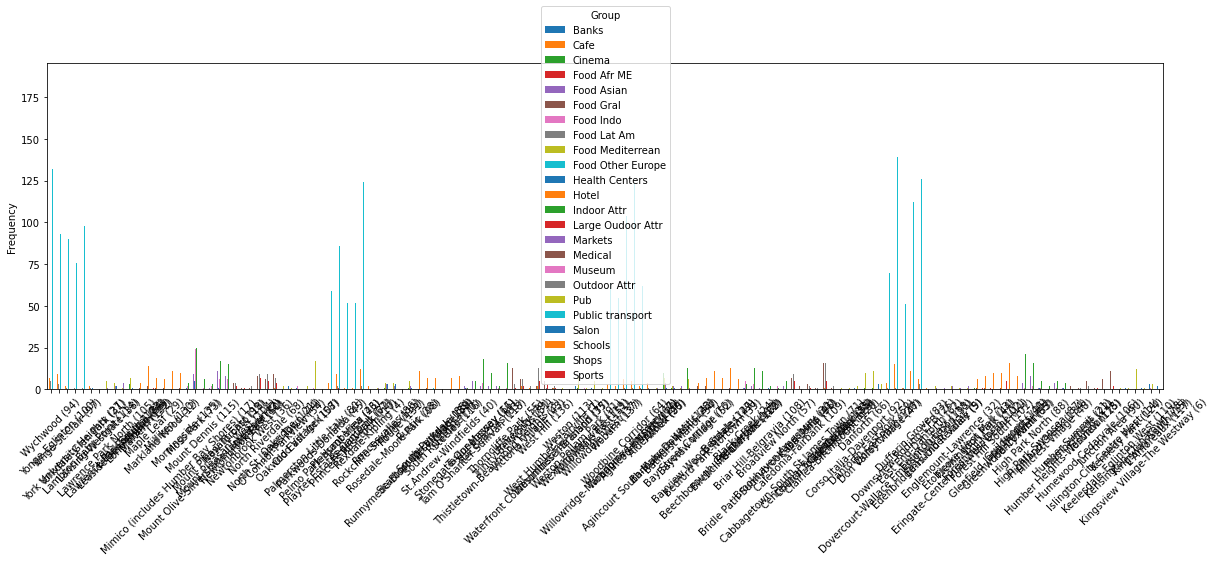

In [7]:
venues_freq.T.plot(kind='bar',figsize=(20, 6))
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The range of each venue is considerably different! Therefore we should normalize the ranges

#### 4.1 Normalize the venues per neighborhood

In [8]:
norm_venues_freq = ((venues_freq.T-venues_freq.T.min())/(venues_freq.T.max()-venues_freq.T.min())).T
print("There are {} rows and {} columns in the dataset".format(norm_venues_freq.shape[0],norm_venues_freq.shape[1]))
norm_venues_freq.head()

There are 24 rows and 140 columns in the dataset


,Wychwood (94),Yonge-Eglinton (100),Yonge-St.Clair (97),York University Heights (27),Yorkdale-Glen Park (31),Lambton Baby Point (114),Lansing-Westgate (38),Lawrence Park North (105),Lawrence Park South (103),Leaside-Bennington (56),Little Portugal (84),Long Branch (19),Malvern (132),Maple Leaf (29),Markland Wood (12),Milliken (130),Mimico (includes Humber Bay Shores) (17),Morningside (135),Moss Park (73),Mount Dennis (115),Mount Olive-Silverstone-Jamestown (2),Mount Pleasant East (99),Mount Pleasant West (104),New Toronto (18),Newtonbrook East (50),Newtonbrook West (36),Niagara (82),North Riverdale (68),North St.James Town (74),O'Connor-Parkview (54),Oakridge (121),Oakwood Village (107),Old East York (58),Palmerston-Little Italy (80),Parkwoods-Donalda (45),Pelmo Park-Humberlea (23),Playter Estates-Danforth (67),Pleasant View (46),Princess-Rosethorn (10),Regent Park (72),Rexdale-Kipling (4),Rockcliffe-Smythe (111),Roncesvalles (86),Rosedale-Moore Park (98),Rouge (131),Runnymede-Bloor West Village (89),Rustic (28),Scarborough Village (139),South Parkdale (85),South Riverdale (70),St.Andrew-Windfields (40),Steeles (116),Stonegate-Queensway (16),Tam O'Shanter-Sullivan (118),Taylor-Massey (61),The Beaches (63),Thistletown-Beaumond Heights (3),Thorncliffe Park (55),Trinity-Bellwoods (81),University (79),Victoria Village (43),Waterfront Communities-The Island (77),West Hill (136),West Humber-Clairville (1),Westminster-Branson (35),Weston (113),Weston-Pellam Park (91),Wexford/Maryvale (119),Willowdale East (51),Willowdale West (37),Willowridge-Martingrove-Richview (7),Woburn (137),Woodbine Corridor (64),Woodbine-Lumsden (60),Agincourt North (129),Agincourt South-Malvern West (128),Alderwood (20),Annex (95),Banbury-Don Mills (42),Bathurst Manor (34),Bay Street Corridor (76),Bayview Village (52),Bayview Woods-Steeles (49),Bedford Park-Nortown (39),Beechborough-Greenbrook (112),Bendale (127),Birchcliffe-Cliffside (122),Black Creek (24),Blake-Jones (69),Briar Hill-Belgravia (108),Bridle Path-Sunnybrook-York Mills (41),Broadview North (57),Brookhaven-Amesbury (30),Cabbagetown-South St.James Town (71),Caledonia-Fairbank (109),Casa Loma (96),Centennial Scarborough (133),Church-Yonge Corridor (75),Clairlea-Birchmount (120),Clanton Park (33),Cliffcrest (123),Corso Italia-Davenport (92),Danforth (66),Danforth East York (59),Don Valley Village (47),Dorset Park (126),Dovercourt-Wallace Emerson-Junction (93),Downsview-Roding-CFB (26),Dufferin Grove (83),East End-Danforth (62),Edenbridge-Humber Valley (9),Eglinton East (138),Elms-Old Rexdale (5),Englemount-Lawrence (32),Eringate-Centennial-West Deane (11),Etobicoke West Mall (13),Flemingdon Park (44),Forest Hill North (102),Forest Hill South (101),Glenfield-Jane Heights (25),Greenwood-Coxwell (65),Guildwood (140),Henry Farm (53),High Park North (88),High Park-Swansea (87),Highland Creek (134),Hillcrest Village (48),Humber Heights-Westmount (8),Humber Summit (21),Humbermede (22),Humewood-Cedarvale (106),Ionview (125),Islington-City Centre West (14),Junction Area (90),Keelesdale-Eglinton West (110),Kennedy Park (124),Kensington-Chinatown (78),Kingsview Village-The Westway (6),Kingsway South (15),L'Amoreaux (117)
Group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Banks,0.250000,0.250000,0.000000,0.250000,0.250000,0.000000,0.500000,0.750000,0.250000,0.750000,0.000000,0.500000,0.250000,0.250000,0.25,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.500000,0.000000,0.000000,0.500000,0.250000,0.000000,0.000000,0.000000,0.000000,0.500000,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.0,0.500000,0.000000,0.000000,0.000000,0.0,0.500000,0.000000,0.250000,0.500000,0.500000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.5,0.250000,0.000000,0.000000,0.500000,0.000000,0.250000,0.000000,0.500000,0.250000,0.000000,0.000000,0.50

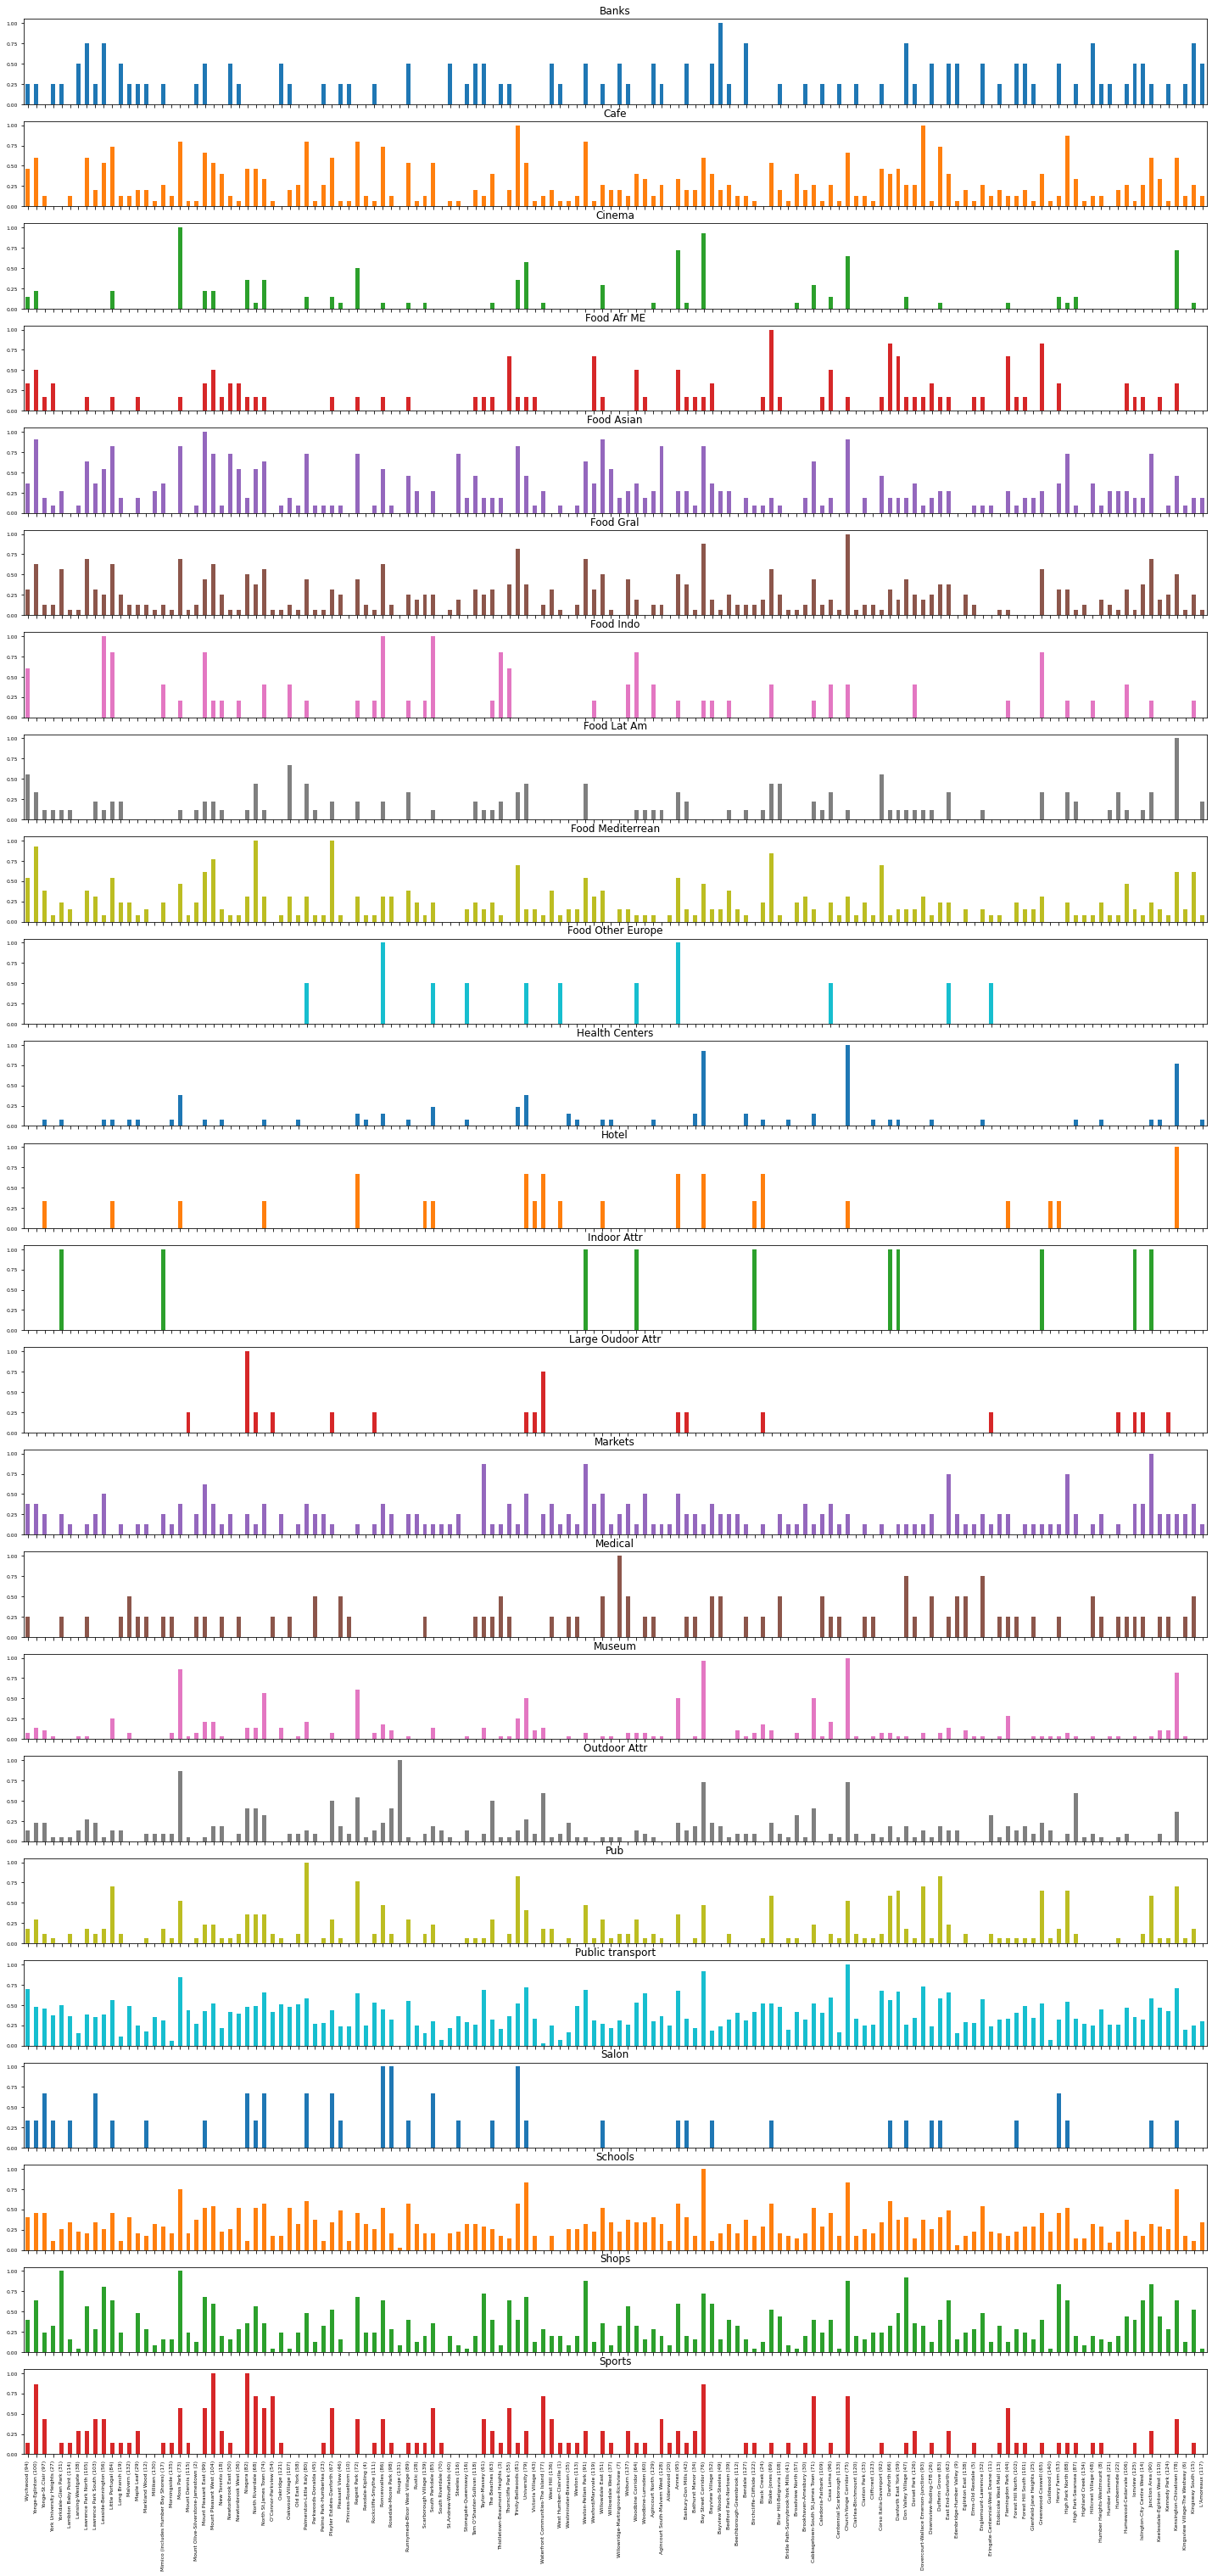

In [9]:
norm_venues_freq.iloc[0:24,:].T.plot(kind='bar',figsize=(25, 1),subplots=True,layout=(24,1),legend=False,fontsize=6)
plt.subplots_adjust(bottom=None,top=40)
plt.savefig("Figures/frequency_venues.pdf", bbox_inches = "tight")
plt.show()

### 5. Cluster the neighborhoods

In [10]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(norm_venues_freq.T)
labels = k_means.labels_
print(labels)
print("K =",clusterNum, "Inertia:", k_means.inertia_)

[0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 2 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0
 1 1 2 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1 0 1 0 1 1 1 0 1
 1 1 1 2 1 1 2 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 2 1 1 1 0 0 0 1 1 0 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 2 1 1 1]
K = 3 Inertia: 88.12413861364043


#### 5.1 Define the optimal number of clusters

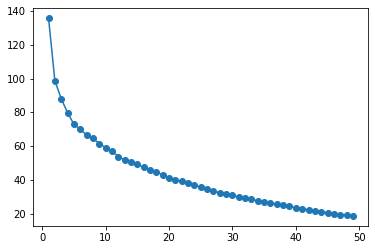

In [11]:
max_range=50
inertia=[]
for cluster in range(1,max_range):
    cluster_num = cluster
    k_means = KMeans(init = "k-means++", n_clusters = cluster_num, n_init = 12,random_state=1)
    k_means.fit(norm_venues_freq.T)
    inertia.append(k_means.inertia_)
    
plt.plot(range(1,max_range),inertia, marker='o')
plt.savefig("Figures/kmeans_inertia.pdf", bbox_inches = "tight")
plt.show()

In [12]:
print("7 clusters seem to capture the best elbow point")

7 clusters seem to capture the best elbow point


### 5.2 Define the 7 clusters

In [13]:
clusterNum = 7
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12,random_state=1)
k_means.fit(norm_venues_freq.T)
labels = k_means.labels_
print("K =",clusterNum, "Inertia:", k_means.inertia_)
Counter(sorted(labels))

K = 7 Inertia: 66.66604004962112


Counter({0: 10, 1: 24, 2: 11, 3: 36, 4: 7, 5: 46, 6: 6})

In [14]:
num_clusters_df=pd.DataFrame(pd.Series(Counter(sorted(labels)),name='Num_neighborhoods')).reset_index().rename(columns={'index':'Cluster'})
num_clusters_df

,Cluster,Num_neighborhoods
0,0,10
1,1,24
2,2,11
3,3,36
4,4,7
5,5,46
6,6,6


### 5.3 Add labels to columns

In [15]:
neighborhoods=pd.read_csv(neighborhoods_dir)
neighborhoods=neighborhoods[['AREA_NAME','LATITUDE','LONGITUDE']]
neighborhoods.rename(columns={'AREA_NAME':'Neighborhood'}, inplace=True)
neighborhoods['Cluster']=labels
neighborhoods.head()

,Neighborhood,LATITUDE,LONGITUDE,Cluster
0,Wychwood (94),43.676919,-79.425515,2
1,Yonge-Eglinton (100),43.704689,-79.403590,6
2,Yonge-St.Clair (97),43.687859,-79.397871,5
3,York University Heights (27),43.765736,-79.488883,5
4,Yorkdale-Glen Park (31),43.714672,-79.457108,0


In [16]:
cluster_nb=norm_venues_freq.T
cluster_nb=cluster_nb.reset_index().rename(columns={'index': 'Neighborhood'})
cluster_nb.head()

Group,Neighborhood,Banks,Cafe,Cinema,Food Afr ME,Food Asian,Food Gral,Food Indo,Food Lat Am,Food Mediterrean,Food Other Europe,Health Centers,Hotel,Indoor Attr,Large Oudoor Attr,Markets,Medical,Museum,Outdoor Attr,Pub,Public transport,Salon,Schools,Shops,Sports
0,Wychwood (94),0.25,0.466667,0.142857,0.333333,0.363636,0.3125,0.6,0.555556,0.538462,0.0,0.000000,0.000000,0.0,0.0,0.375,0.25,0.071429,0.136364,0.176471,0.693182,0.333333,0.400000,0.40,0.142857
1,Yonge-Eglinton (100),0.25,0.600000,0.214286,0.500000,0.909091,0.6250,0.0,0.333333,0.923077,0.0,0.000000,0.000000,0.0,0.0,0.375,0.00,0.142857,0.227273,0.294118,0.471591,0.333333,0.457143,0.64,0.857143
2,Yonge-St.Clair (97),0.00,0.133333,0.000000,0.166667,0.181818,0.1250,0.0,0.111111,0.384615,0.0,0.076923,0.333333,0.0,0.0,0.250,0.00,0.107143,0.227273,0.117647,0.454545,0.666667,0.457143,0.24,0.428571
3,York University Heights (27),0.25,0.000000,0.000000,0.333333,0.090909,0.1250,0.0,0.111111,0.076923,0.0,0.000000,0.000000,0.0,0.0,0.000,0.00,0.035714,0.045455,0.058824,0.375000,0.333333,0.114286,0.32,0.000000
4,Yorkdale-Glen Park (31),0.25,0.000000,0.000000,0.000000,0.272727,0.5625,0.0,0.111111,0.230769,0.0,0.076923,0.000000,1.0,0.0,0.250,0.25,0.000000,0.045455,0.000000,0.500000,0.000000,0.257143,1.00,0.142857


In [17]:
cluster_nb = neighborhoods.merge(cluster_nb,on='Neighborhood')
cluster_nb.head()

,Neighborhood,LATITUDE,LONGITUDE,Cluster,Banks,Cafe,Cinema,Food Afr ME,Food Asian,Food Gral,Food Indo,Food Lat Am,Food Mediterrean,Food Other Europe,Health Centers,Hotel,Indoor Attr,Large Oudoor Attr,Markets,Medical,Museum,Outdoor Attr,Pub,Public transport,Salon,Schools,Shops,Sports
0,Wychwood (94),43.676919,-79.425515,2,0.25,0.466667,0.142857,0.333333,0.363636,0.3125,0.6,0.555556,0.538462,0.0,0.000000,0.000000,0.0,0.0,0.375,0.25,0.071429,0.136364,0.176471,0.693182,0.333333,0.400000,0.40,0.142857
1,Yonge-Eglinton (100),43.704689,-79.403590,6,0.25,0.600000,0.214286,0.500000,0.909091,0.6250,0.0,0.333333,0.923077,0.0,0.000000,0.000000,0.0,0.0,0.375,0.00,0.142857,0.227273,0.294118,0.471591,0.333333,0.457143,0.64,0.857143
2,Yonge-St.Clair (97),43.687859,-79.397871,5,0.00,0.133333,0.000000,0.166667,0.181818,0.1250,0.0,0.111111,0.384615,0.0,0.076923,0.333333,0.0,0.0,0.250,0.00,0.107143,0.227273,0.117647,0.454545,0.666667,0.457143,0.24,0.428571
3,York University Heights (27),43.765736,-79.488883,5,0.25,0.000000,0.000000,0.333333,0.090909,0.1250,0.0,0.111111,0.076923,0.0,0.000000,0.000000,0.0,0.0,0.000,0.00,0.035714,0.045455,0.058824,0.375000,0.333333,0.114286,0.32,0.000000
4,Yorkdale-Glen Park (31),43.714672,-79.457108,0,0.25,0.000000,0.000000,0.000000,0.272727,0.5625,0.0,0.111111,0.230769,0.0,0.076923,0.000000,1.0,0.0,0.250,0.25,0.000000,0.045455,0.000000,0.500000,0.000000,0.257143,1.00,0.142857


## 6. Understand the clusters

### 6.1 View clusters in map

In [18]:
# create map
map_clusters = folium.Map(location=[43.670278, -79.386667], zoom_start=11)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
# markers_colors = []
for lat, lon, poi, cluster in zip(cluster_nb['LATITUDE'], cluster_nb['LONGITUDE'], cluster_nb['Neighborhood'], cluster_nb['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    color = rainbow[int(cluster)]
    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7).add_to(map_clusters)
    
for i in range(len(rainbow)):
    mark_lat=43.646843-(0.01*i)
   
    folium.CircleMarker(
        [mark_lat, -79.240079],
        radius=5,
        color=rainbow[i],
        fill=True,
        fill_color=rainbow[i],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters= map_clusters     
map_clusters

### 6.2 View commodities of the clusters

In [19]:
pd.DataFrame(k_means.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1.750000e-01,0.346667,0.000000,0.300000,0.327273,0.350000,0.220000,0.155556,0.200000,5.000000e-02,0.030769,3.333333e-02,1.000000e+00,2.500000e-02,0.312500,0.075000,0.042857,0.086364,0.341176,0.511364,0.066667,0.334286,0.484000,0.142857
1,3.854167e-01,0.297222,0.053571,0.180556,0.378788,0.307292,0.183333,0.134259,0.233974,4.166667e-02,0.016026,2.777778e-02,2.775558e-17,2.083333e-02,0.296875,0.229167,0.058036,0.111742,0.137255,0.398201,0.138889,0.325000,0.486667,0.244048
2,6.818182e-02,0.715152,0.149351,0.151515,0.570248,0.448864,0.454545,0.242424,0.391608,1.818182e-01,0.076923,9.090909e-02,1.387779e-17,6.938894e-18,0.295455,0.045455,0.191558,0.157025,0.561497,0.549587,0.515152,0.464935,0.483636,0.246753
3,3.819444e-01,0.124074,0.003968,0.050926,0.133838,0.109375,0.055556,0.077160,0.123932,-3.469447e-17,0.019231,-1.387779e-17,-1.387779e-17,6.944444e-03,0.152778,0.326389,0.023810,0.064394,0.042484,0.307449,0.037037,0.271429,0.197778,0.071429
4,2.775558e-17,0.619048,0.724490,0.238095,0.636364,0.625000,0.171429,0.317460,0.406593,2.142857e-01,0.516484,6.190476e-01,1.387779e-17,7.142857e-02,0.303571,0.000000,0.750000,0.532468,0.537815,0.786526,0.142857,0.738776,0.742857,0.510204
5,4.891304e-02,0.127536,0.009317,0.065217,0.118577,0.092391,0.021739,0.028986,0.107023,3.260870e-02,0.028428,7.246377e-02,-5.551115e-17,5.434783e-02,0.144022,0.076087,0.042702,0.135375,0.053708,0.294837,0.057971,0.208075,0.167826,0.124224
6,4.166667e-02,0.533333,0.166667,0.416667,0.439394,0.500000,0.100000,0.296296,0.807692,0.000000e+00,0.000000,1.387779e-17,1.387779e-17,2.500000e-01,0.208333,0.000000,0.136905,0.325758,0.352941,0.484848,0.388889,0.423810,0.533333,0.714286


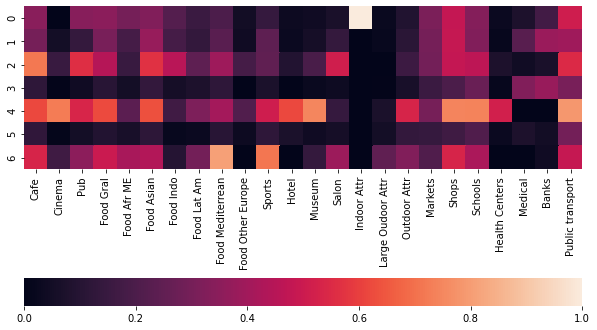

In [20]:
heatmap_df = pd.DataFrame(k_means.cluster_centers_,columns=cluster_nb.columns[4:])
heatmap_df=heatmap_df[['Cafe', 'Cinema', 'Pub',  'Food Gral', 'Food Afr ME', 'Food Asian',
                       'Food Indo', 'Food Lat Am', 'Food Mediterrean', 'Food Other Europe',    'Sports',
                       'Hotel', 'Museum', 'Salon','Indoor Attr', 'Large Oudoor Attr','Outdoor Attr', 
                       'Markets', 'Shops', 'Schools', 'Health Centers', 'Medical', 'Banks',
                       'Public transport']]

plt.figure(figsize=(10,10)) 
sns.heatmap(pd.DataFrame(heatmap_df),square=True,cbar_kws={"orientation": "horizontal",'pad':0.2})
plt.savefig("Figures/heatmap.pdf", bbox_inches = "tight")
plt.show()

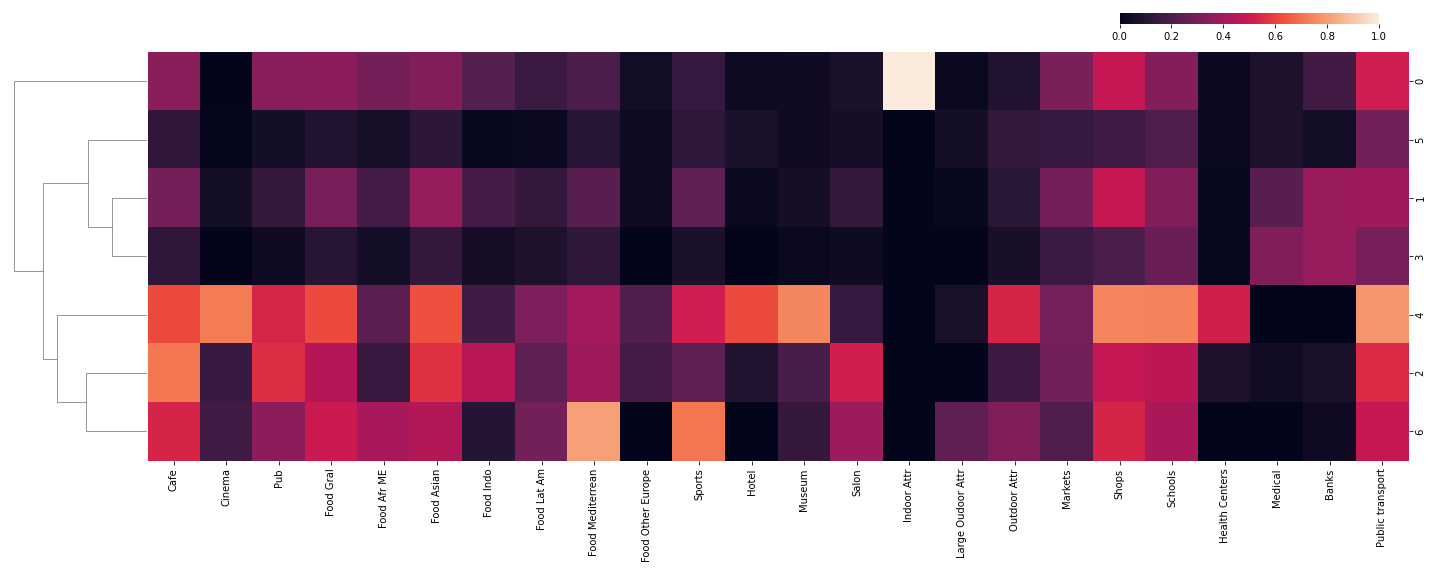

In [21]:
heatmap_df = pd.DataFrame(k_means.cluster_centers_,columns=cluster_nb.columns[4:])
heatmap_df=heatmap_df[['Cafe', 'Cinema', 'Pub',  'Food Gral', 'Food Afr ME', 'Food Asian',
                       'Food Indo', 'Food Lat Am', 'Food Mediterrean', 'Food Other Europe',    'Sports',
                       'Hotel', 'Museum', 'Salon','Indoor Attr', 'Large Oudoor Attr','Outdoor Attr', 
                       'Markets', 'Shops', 'Schools', 'Health Centers', 'Medical', 'Banks',
                       'Public transport']]

sns.clustermap(pd.DataFrame(heatmap_df),figsize=(20,8),col_cluster=False,dendrogram_ratio=0.1,cbar_pos=(0.78, 0.95, 0.18, 0.02),cbar_kws={"orientation": "horizontal"}, metric="correlation")
plt.savefig("Figures/heatmap_clustered.pdf", bbox_inches = "tight")
plt.show()

In [22]:
norm_freq_clust_df = ((cluster_nb.groupby("Cluster").sum()).T).drop(["LATITUDE","LONGITUDE"], axis=0)
norm_freq_clust_df.head()

Cluster,0,1,2,3,4,5,6
Banks,1.750000,9.250000,0.750000,13.750000,0.000000,2.250000,0.250000
Cafe,3.466667,7.133333,7.866667,4.466667,4.333333,5.866667,3.200000
Cinema,0.000000,1.285714,1.642857,0.142857,5.071429,0.428571,1.000000
Food Afr ME,3.000000,4.333333,1.666667,1.833333,1.666667,3.000000,2.500000
Food Asian,3.272727,9.090909,6.272727,4.818182,4.454545,5.454545,2.636364


In [23]:
freq_clust_df = (norm_freq_clust_df.T*(venues_freq.T.max()-venues_freq.T.min())+venues_freq.T.min()).T
freq_clust_df.head()

Cluster,0,1,2,3,4,5,6
Banks,7.0,37.0,3.0,55.0,0.0,9.0,1.0
Cafe,52.0,107.0,118.0,67.0,65.0,88.0,48.0
Cinema,0.0,18.0,23.0,2.0,71.0,6.0,14.0
Food Afr ME,18.0,26.0,10.0,11.0,10.0,18.0,15.0
Food Asian,36.0,100.0,69.0,53.0,49.0,60.0,29.0


In [24]:
freq_clust_df=freq_clust_df.astype('int')
freq_clust_df.head()

Cluster,0,1,2,3,4,5,6
Banks,7,37,3,55,0,9,1
Cafe,52,107,118,67,65,88,48
Cinema,0,18,23,2,71,6,14
Food Afr ME,18,26,10,11,10,17,15
Food Asian,36,99,68,52,48,59,28


### Venues and clusters

In [25]:
clust_venues_freq=venues_freq.T.reset_index().rename(columns={'index': 'Neighborhood'}).merge(cluster_nb[['Neighborhood','Cluster']],on='Neighborhood')
clust_venues_freq.head()

,Neighborhood,Banks,Cafe,Cinema,Food Afr ME,Food Asian,Food Gral,Food Indo,Food Lat Am,Food Mediterrean,Food Other Europe,Health Centers,Hotel,Indoor Attr,Large Oudoor Attr,Markets,Medical,Museum,Outdoor Attr,Pub,Public transport,Salon,Schools,Shops,Sports,Cluster
0,Wychwood (94),1,7,2,2,4,5,3,5,7,0,0,0,0,0,3,1,2,3,3,132,1,14,10,1,2
1,Yonge-Eglinton (100),1,9,3,3,10,10,0,3,12,0,0,0,0,0,3,0,4,5,5,93,1,16,16,6,6
2,Yonge-St.Clair (97),0,2,0,1,2,2,0,1,5,0,1,1,0,0,2,0,3,5,2,90,2,16,6,3,5
3,York University Heights (27),1,0,0,2,1,2,0,1,1,0,0,0,0,0,0,0,1,1,1,76,1,4,8,0,5
4,Yorkdale-Glen Park (31),1,0,0,0,3,9,0,1,3,0,1,0,1,0,2,1,0,1,0,98,0,9,25,1,0


### 7 Other variables that were not used for clustering

#### 7.1 Income per cluster

In [26]:
temp_nb_df = pd.read_csv(neighborhoods_dir)
temp_nb_df = temp_nb_df[['AREA_SHORT_CODE','AREA_NAME']]
temp_nb_df.head()

,AREA_SHORT_CODE,AREA_NAME
0,94,Wychwood (94)
1,100,Yonge-Eglinton (100)
2,97,Yonge-St.Clair (97)
3,27,York University Heights (27)
4,31,Yorkdale-Glen Park (31)


In [27]:
income_df=pd.read_csv(income_dir)
income_df= income_df.merge(temp_nb_df,left_on='Neighbourhood Number',right_on='AREA_SHORT_CODE').drop(columns=('AREA_SHORT_CODE')).rename(columns={'AREA_NAME':'Neighborhood'})
income_df = income_df.merge(cluster_nb[['Neighborhood','Cluster']], on='Neighborhood')
income_df.head()

,Neighbourhood Number,After-tax income: Average amount ($),Population density per square kilometre,Neighborhood,Cluster
0,129,"26,955","3,929",Agincourt North (129),3
1,128,"27,928","3,034",Agincourt South-Malvern West (128),1
2,20,"39,159","2,435",Alderwood (20),5
3,95,"80,138","10,863",Annex (95),4
4,42,"51,874","2,775",Banbury-Don Mills (42),1


In [28]:
income_df['Income']=income_df.iloc[:,[1]].replace(',','',regex=True).astype('float')
income_df['Density']=income_df.iloc[:,[2]].replace(',','',regex=True).astype('float')
income_df.head()

,Neighbourhood Number,After-tax income: Average amount ($),Population density per square kilometre,Neighborhood,Cluster,Income,Density
0,129,"26,955","3,929",Agincourt North (129),3,26955.0,3929.0
1,128,"27,928","3,034",Agincourt South-Malvern West (128),1,27928.0,3034.0
2,20,"39,159","2,435",Alderwood (20),5,39159.0,2435.0
3,95,"80,138","10,863",Annex (95),4,80138.0,10863.0
4,42,"51,874","2,775",Banbury-Don Mills (42),1,51874.0,2775.0


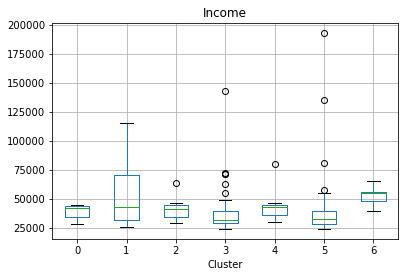

In [29]:
income_df[['Cluster','Income']].boxplot(column='Income', by='Cluster')
plt.suptitle('')
plt.savefig("Figures/income_cluster.pdf", bbox_inches = "tight")
plt.show()

### 7.2 Population Density

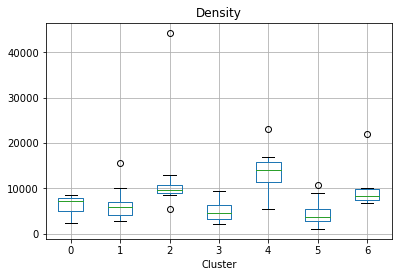

In [30]:
income_df[['Cluster','Density']].boxplot(column='Density', by='Cluster')
plt.suptitle('')
plt.savefig("Figures/density_cluster.pdf", bbox_inches = "tight")
plt.show()

#### 7.3 Crime rate

In [31]:
crime_df=pd.read_csv(crime_dir)
crime_df=crime_df.rename(columns={'Hood_ID':'Neighbourhood Number'})
crime_df=crime_df.merge(income_df[['Neighbourhood Number','Cluster']])
crime_df.head()

,Neighbourhood,Neighbourhood Number,Assault_Rate_2019,AutoTheft_Rate_2019,BreakandEnter_Rate_2019,Homicide_Rate_2019,Homicide_Rate_2019.1,TheftOver_Rate_2019,Cluster
0,South Parkdale,85,1148.8,91.5,407.3,4.6,4.6,100.7,2
1,South Riverdale,70,936.3,143.5,477.1,0.0,0.0,75.3,5
2,St.Andrew-Windfields,40,325.6,196.5,466.0,0.0,0.0,33.7,3
3,Taylor-Massey,61,777.9,76.5,401.7,6.4,6.4,19.1,1
4,Humber Summit,21,950.4,1087.3,459.1,24.2,24.2,177.2,5


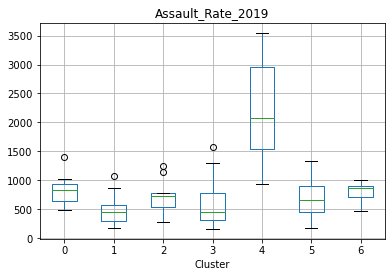

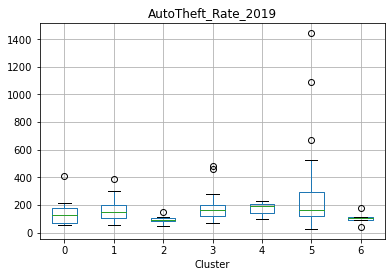

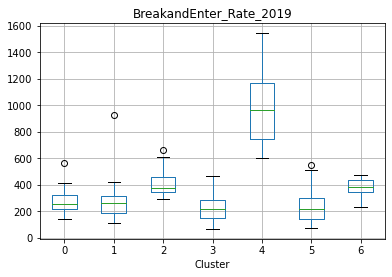

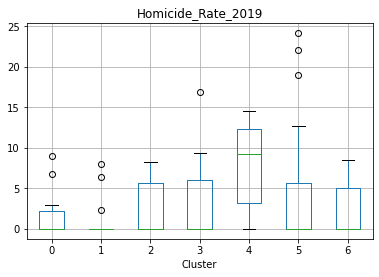

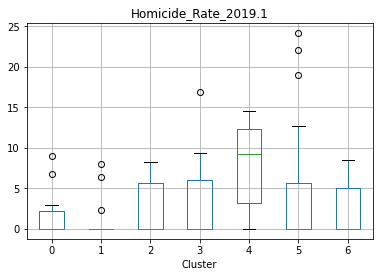

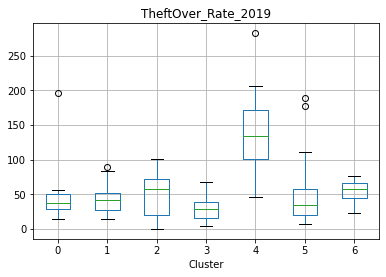

In [47]:
crime_cols=['Assault_Rate_2019', 'AutoTheft_Rate_2019', 'BreakandEnter_Rate_2019', 'Homicide_Rate_2019', 'Homicide_Rate_2019.1', 'TheftOver_Rate_2019']
cols_df=list(crime_cols+['Cluster'])


for i,col in enumerate (crime_cols):
    
    crime_df[cols_df].boxplot(column=col, by='Cluster')
    plt.suptitle('')
    plt.savefig("Figures/crime_cluster_{}.pdf".format(i), bbox_inches = "tight")
plt.show()

### 8 Use the clusters to make recommendations

Parameters:

1 Not desired

2 Partially against

3 Neutral

4 In favour

5 Desired

In [33]:
#Function to define best candidate neighborhoods

def nb_recommend(profile_dict):
    profile_df = pd.DataFrame(pd.Series(profile_dict,name='Interest'))
    profile_df['Interest'] = profile_df['Interest'].pow(2)
    profile_df = profile_df.merge(heatmap_df.T,left_index=True, right_index=True)
    corr_series = profile_df.corr().iloc[0,:].sort_values(ascending=False)
    corr_series = pd.DataFrame(corr_series).reset_index().rename(columns={'index':'Cluster', 'Interest':'Similarity'})
    corr_series = corr_series.iloc[1:,:]
    return corr_series

In [34]:
#Funtion to creat custom map
def clust_map(df,cluster):
    cluster_nb=df[df['Cluster']==cluster]
    # create map
    map_clusters = folium.Map(location=[43.670278, -79.386667], zoom_start=11)

    # set color scheme for the clusters
    x = np.arange(clusterNum)
    ys = [i + x + (i*x)**2 for i in range(clusterNum)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]

    # add markers to the map
    # markers_colors = []
    for lat, lon, poi, cluster in zip(cluster_nb['LATITUDE'], cluster_nb['LONGITUDE'], cluster_nb['Neighborhood'], cluster_nb['Cluster']):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        color = rainbow[int(cluster)]

        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7).add_to(map_clusters)
    return map_clusters

### 8.1 Case 1: Food venues (any) and public transport are a must, shops and salons would be advantageous

In [35]:
profile1 = {'Cafe': 5, 'Cinema' : 3, 'Pub' :3,  'Food Gral':5, 'Food Afr ME' : 5, 'Food Asian':5,
                       'Food Indo':5, 'Food Lat Am':5, 'Food Mediterrean':5, 'Food Other Europe':5, 'Sports':3,
                       'Hotel':3, 'Museum':3, 'Salon':4,'Indoor Attr':3, 'Large Oudoor Attr':3,'Outdoor Attr':3, 
                       'Markets':3, 'Shops':4, 'Schools':3, 'Health Centers':3, 'Medical':3, 'Banks':3,
                       'Public transport':5}


prof1_df=nb_recommend(profile1)
prof1_df

,Cluster,Similarity
1,2,0.531172
2,6,0.402448
3,1,0.320071
4,0,0.159826
5,5,0.155494
6,4,0.068835
7,3,0.018235


In [36]:
map_prof1 = clust_map(cluster_nb,2)
map_prof1

In [37]:
clust_venues_freq[clust_venues_freq['Cluster']==2]

,Neighborhood,Banks,Cafe,Cinema,Food Afr ME,Food Asian,Food Gral,Food Indo,Food Lat Am,Food Mediterrean,Food Other Europe,Health Centers,Hotel,Indoor Attr,Large Oudoor Attr,Markets,Medical,Museum,Outdoor Attr,Pub,Public transport,Salon,Schools,Shops,Sports,Cluster
0,Wychwood (94),1,7,2,2,4,5,3,5,7,0,0,0,0,0,3,1,2,3,3,132,1,14,10,1,2
10,Little Portugal (84),0,11,3,1,9,10,4,2,7,0,1,1,0,0,0,0,7,3,12,109,1,16,16,1,2
21,Mount Pleasant East (99),2,10,3,2,11,7,4,2,8,0,1,0,0,0,5,1,6,1,4,85,1,18,17,4,2
28,North St.James Town (74),0,5,5,1,7,9,2,1,4,0,1,1,0,0,3,0,16,7,6,125,2,20,9,4,2
33,Palmerston-Little Italy (80),0,12,2,0,8,7,1,4,4,1,0,0,0,0,3,0,6,3,17,113,2,21,12,0,2
42,Roncesvalles (86),0,11,1,1,6,10,5,2,4,2,2,0,0,0,3,0,5,5,8,89,3,18,16,3,2
48,South Parkdale (85),0,8,0,0,3,4,5,1,3,1,3,1,0,0,1,0,4,4,4,63,2,7,9,4,2
58,Trinity-Bellwoods (81),0,15,5,1,9,13,0,3,9,0,3,0,0,0,1,0,7,3,14,102,3,20,10,1,2
106,Dovercourt-Wallace Emerson-Junction (93),0,15,0,1,1,3,0,1,4,0,0,0,0,0,1,0,2,3,12,139,0,13,8,0,2
108,Dufferin Grove (83),0,11,1,1,3,6,0,0,3,0,0,0,0,0,0,0,2,4,14,112,1,14,10,0,2


In [38]:
clust_venues_freq

,Neighborhood,Banks,Cafe,Cinema,Food Afr ME,Food Asian,Food Gral,Food Indo,Food Lat Am,Food Mediterrean,Food Other Europe,Health Centers,Hotel,Indoor Attr,Large Oudoor Attr,Markets,Medical,Museum,Outdoor Attr,Pub,Public transport,Salon,Schools,Shops,Sports,Cluster
0,Wychwood (94),1,7,2,2,4,5,3,5,7,0,0,0,0,0,3,1,2,3,3,132,1,14,10,1,2
1,Yonge-Eglinton (100),1,9,3,3,10,10,0,3,12,0,0,0,0,0,3,0,4,5,5,93,1,16,16,6,6
2,Yonge-St.Clair (97),0,2,0,1,2,2,0,1,5,0,1,1,0,0,2,0,3,5,2,90,2,16,6,3,5
3,York University Heights (27),1,0,0,2,1,2,0,1,1,0,0,0,0,0,0,0,1,1,1,76,1,4,8,0,5
4,Yorkdale-Glen Park (31),1,0,0,0,3,9,0,1,3,0,1,0,1,0,2,1,0,1,0,98,0,9,25,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Kennedy Park (124),1,1,0,0,1,4,0,0,1,0,0,0,0,1,2,1,3,0,1,84,0,9,7,0,3
136,Kensington-Chinatown (78),0,9,10,2,5,8,0,9,8,0,10,3,0,0,2,0,23,8,12,134,1,26,16,3,4
137,Kingsview Village-The Westway (6),1,2,0,0,1,1,0,0,2,0,0,0,0,0,2,1,1,0,1,45,0,6,3,0,3
138,Kingsway South (15),3,4,1,0,2,4,1,0,8,0,0,0,0,0,3,2,0,0,3,54,0,4,13,1,1


### 8.2 Case 2: No large gatherings, food places are a disadvantage. Parks and open places are a must, sports and markets are advantageous

In [39]:
profile2 = {'Cafe': 2, 'Cinema' : 1, 'Pub' :1,  'Food Gral':2, 'Food Afr ME' : 2, 'Food Asian':2,
                       'Food Indo':2, 'Food Lat Am':2, 'Food Mediterrean':2, 'Food Other Europe':2, 'Sports':4,
                       'Hotel':2, 'Museum':2, 'Salon':2,'Indoor Attr':3, 'Large Oudoor Attr':1,'Outdoor Attr':5, 
                       'Markets':4, 'Shops':2, 'Schools':1, 'Health Centers':2, 'Medical':3, 'Banks':2,
                       'Public transport':3}


prof2_df=nb_recommend(profile2)
prof2_df

,Cluster,Similarity
1,5,0.301164
2,6,0.081362
3,3,0.072966
4,0,0.064855
5,1,0.053592
6,4,-0.049991
7,2,-0.175670


In [40]:
map_prof2 = clust_map(cluster_nb,5)
map_prof2

In [41]:
clust_venues_freq[clust_venues_freq['Cluster']==5]

,Neighborhood,Banks,Cafe,Cinema,Food Afr ME,Food Asian,Food Gral,Food Indo,Food Lat Am,Food Mediterrean,Food Other Europe,Health Centers,Hotel,Indoor Attr,Large Oudoor Attr,Markets,Medical,Museum,Outdoor Attr,Pub,Public transport,Salon,Schools,Shops,Sports,Cluster
2,Yonge-St.Clair (97),0,2,0,1,2,2,0,1,5,0,1,1,0,0,2,0,3,5,2,90,2,16,6,3,5
3,York University Heights (27),1,0,0,2,1,2,0,1,1,0,0,0,0,0,0,0,1,1,1,76,1,4,8,0,5
5,Lambton Baby Point (114),0,2,0,0,0,1,0,1,2,0,0,0,0,0,1,0,0,1,2,73,1,12,4,1,5
15,Milliken (130),0,1,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,2,0,71,0,11,2,0,5
17,Morningside (135),0,2,0,0,0,1,0,0,0,0,1,0,0,0,1,1,2,2,1,20,0,7,4,1,5
19,Mount Dennis (115),0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,87,0,7,6,1,5
23,New Toronto (18),0,6,0,1,1,4,1,1,2,0,1,0,0,0,1,1,1,4,1,48,0,8,5,2,5
29,O'Connor-Parkview (54),0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,2,83,0,6,1,5,5
32,Old East York (58),0,4,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,2,2,100,0,11,6,0,5
35,Pelmo Park-Humberlea (23),1,4,0,0,1,1,0,0,1,0,0,0,0,0,2,0,0,0,1,59,0,4,8,1,5


## 9 Save datasets and maps

In [42]:
venues_radius.to_csv("Datasets/out/venues_radius.csv",index=False)
venues_freq.to_csv("Datasets/out/venues_freq.csv",index=False)
norm_venues_freq.to_csv("Datasets/out/norm_venues_freq.csv",index=False)
num_clusters_df.to_csv("Datasets/out/num_clusters_df.csv",index=False)
cluster_nb.to_csv("Datasets/out/cluster_nb.csv",index=False)

heatmap_df.to_csv("Datasets/out/heatmap_df.csv",index=False)
norm_freq_clust_df.to_csv("Datasets/out/norm_freq_clust_df.csv",index=False)
freq_clust_df.to_csv("Datasets/out/freq_clust_df.csv",index=False)
clust_venues_freq.to_csv("Datasets/out/clust_venues_freq.csv",index=False)
income_df.to_csv("Datasets/out/income_df.csv",index=False)
crime_df.to_csv("Datasets/out/crime_df.csv",index=False)

prof1_df.to_csv("Datasets/out/prof1_df.csv",index=False)
prof2_df.to_csv("Datasets/out/prof2_df.csv",index=False)

In [44]:
import os
import time
from selenium import webdriver

delay=10
#Save the map as an HTML file
#Filename
fn='map_clusters.html' 
#Filepath
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
map_clusters.save(fn)
#Open a browser window...
browser = webdriver.Firefox(r'C:\Users\User\AppData\Local\Programs\Python\Python38\Scripts') 
#..that displays the map...
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
#Grab the screenshot
browser.save_screenshot('Figures/map_clusters.png')
#Close the browser
browser.quit()

In [45]:
delay=10
#Save the map as an HTML file
#Filename
fn='map_prof1.html' 
#Filepath
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
map_prof1.save(fn)
#Open a browser window...
browser = webdriver.Firefox(r'C:\Users\User\AppData\Local\Programs\Python\Python38\Scripts') 
#..that displays the map...
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
#Grab the screenshot
browser.save_screenshot('Figures/map_prof1.png')
#Close the browser
browser.quit()

In [46]:
delay=10
#Save the map as an HTML file
#Filename
fn='map_prof2.html' 
#Filepath
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
map_prof2.save(fn)
#Open a browser window...
browser = webdriver.Firefox(r'C:\Users\User\AppData\Local\Programs\Python\Python38\Scripts') 
#..that displays the map...
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
#Grab the screenshot
browser.save_screenshot('Figures/map_prof2.png')
#Close the browser
browser.quit()